# Projeto 2 - Ciência dos dados

Integrantes: 
<ul>
    <li>Caio Garcia</li>
    <li>Gabriel Penna</li>
    <li>Lucas ulson</li>
    <li>Douglas</li>
</ul>

Objetivo do trabalho: Realizar modelos de predição para encontrar possíveis padrões e respostas para analise da nossa base de dados, a qual fala sobre o aumento no número de horas dos aparelhos eletrônicos em um período de pandemia. 

<h2> Bibliotecas a serem utilizadas </h2>

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

<h2>Lendo a base de dados </h2>

In [2]:
dados = pd.read_excel("Projeto_2_cdados.xlsx")
dados

,Idade,Gênero,Estado,Emprego,Horas,Vontade,Pandemia,Aumento,Retomada,Ajuda
0,18,Masculino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",4,Sim,Sim
1,18,Masculino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",1,Sim,Sim
2,19,Masculino,Solteiro,Estudante universitário,Mais de 10 horas,Não,"Sim, aumentei o numero de horas",2,Não,Sim
3,19,Feminino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",4,Parcialmente,Sim
4,48,Masculino,Casado,Empregador,7 a 10 horas,Não,"Sim, aumentei o numero de horas",6,Parcialmente,Sim
...,...,...,...,...,...,...,...,...,...,...
188,18,Feminino,Solteiro,Estudante universitário,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",7,Sim,Sim
189,16,Feminino,Solteiro,Estudante de colegial,7 a 10 horas,Sim,"Sim, aumentei o numero de horas",4,Sim,Sim
190,17,Masculino,Solteiro,Estudante de colegial,De 1 a 3 horas,Não,"Sim, aumentei o numero de horas",1,Sim,Sim
191,22,Feminino,Solteiro,Empregado,4 a 6 horas,Sim,"Sim, diminui o número de horas",1,Parcialmente,Sim


<h2>Lendo a base de dados</h2>

<h3>Idade</h3>

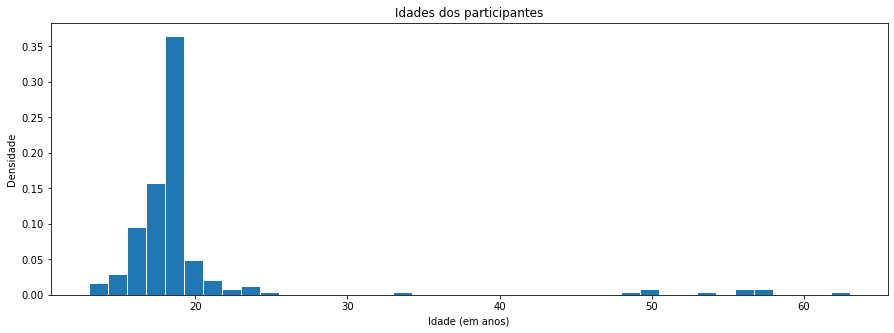

In [3]:
plt.figure(figsize=(15, 5))
plt.hist(dados['Idade'], bins=40, density=True,edgecolor='white',)
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')
plt.title('Idades dos participantes')
plt.show()

In [4]:
dados.Idade.describe()

count    193.000000
mean      19.689119
std        8.030978
min       13.000000
25%       17.000000
50%       18.000000
75%       19.000000
max       63.000000
Name: Idade, dtype: float64

Pelos dados que obtivemos acima, podemos perceber que o nosso público tem como média de idade 19 anos, isso ocorre pois, a pesquisa foi realizada principalmente entre amigos e colegas dos participantes.

<h3>Sexo</h3>

In [5]:
dados.Gênero.value_counts(True)

Feminino     0.626943
Masculino    0.367876
Outro        0.005181
Name: Gênero, dtype: float64

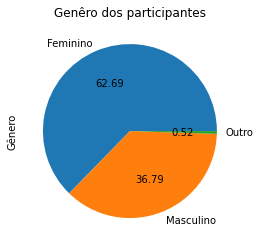

In [6]:
divisao_sexo = dados.Gênero.value_counts()
divisao_sexo.plot(kind='pie', title='Genêro dos participantes', autopct="%.2f")
plt.show()

<h2>Estado civil</h2>

In [7]:
dados.Estado.value_counts(True)

Solteiro    0.854922
Outro       0.124352
Casado      0.020725
Name: Estado, dtype: float64

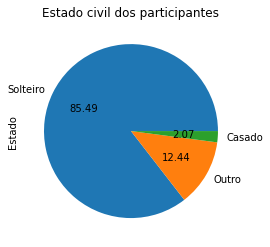

In [8]:
divisao_estado = dados.Estado.value_counts()
divisao_estado.plot(kind='pie', title='Estado civil dos participantes', autopct="%.2f")
plt.show()

<h2>Ocupação</h2>

In [9]:
dados.Emprego.value_counts(True)

Estudante universitário    0.481865
Estudante de colegial      0.430052
Empregado                  0.062176
Desempregado               0.015544
Empregador                 0.010363
Name: Emprego, dtype: float64

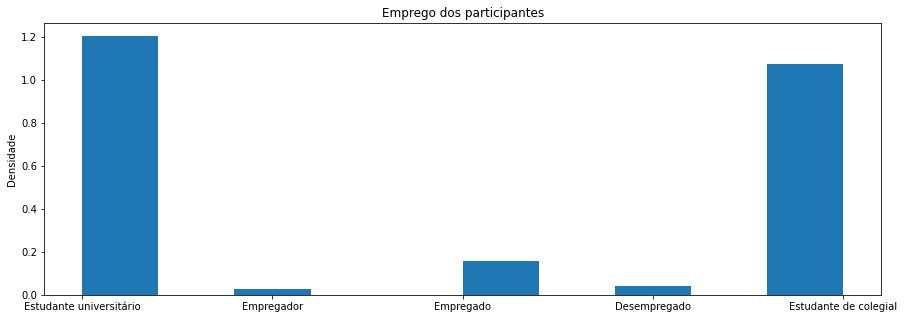

In [10]:
plt.figure(figsize=(15,5))
plt.hist(dados['Emprego'],density=True)
plt.ylabel("Densidade")
plt.title("Emprego dos participantes")
plt.show()

Ao fazer a análise dos gráficos abaixo, podemos notar uma grande concentração de pessoas entre 4 à 10 horas, sendo assim, podemos tirar a conclusão de que houve um aumento significativo do tempo que as pessoas passam na frente do computador, devemos continuar nosso raciocínio para acharmos um padrão ou formalidade.

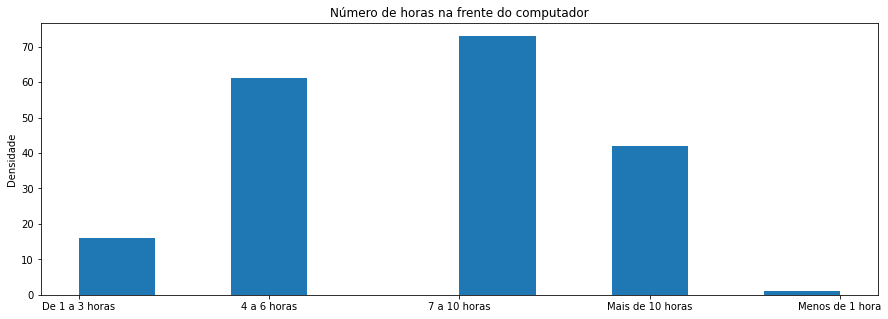

In [11]:
plt.figure(figsize=(15,5))
plt.hist(dados['Horas'][::-1])
plt.ylabel("Densidade")
plt.title("Número de horas na frente do computador")
plt.show()

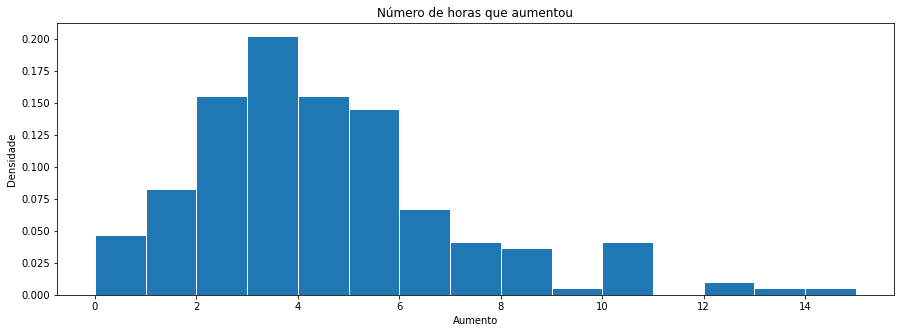

In [12]:
plt.figure(figsize=(15, 5))
plt.hist(dados['Aumento'], bins=15, density=True,edgecolor='white',)
plt.ylabel('Densidade')
plt.xlabel('Aumento')
plt.title('Número de horas que aumentou')
plt.show()

In [13]:
dados.Aumento.describe()

count    193.000000
mean       4.062176
std        2.654844
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       15.000000
Name: Aumento, dtype: float64

## Os participantes tem vontade de diminuir os numeros de horas?

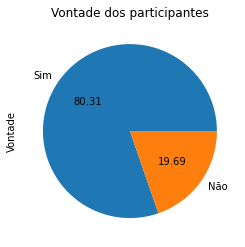

In [14]:
divisao_vontade = dados.Vontade.value_counts()
divisao_vontade.plot(kind='pie', title='Vontade dos participantes', autopct="%.2f")
plt.show()

## Como a pandemia os influenciou

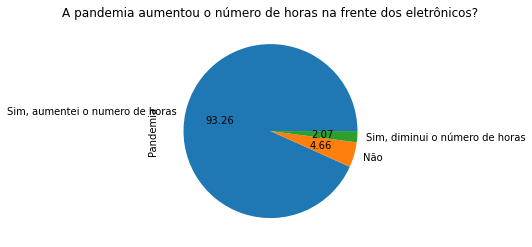

In [15]:
divisao_pandemia = dados.Pandemia.value_counts()
divisao_pandemia.plot(kind='pie', title='A pandemia aumentou o número de horas na frente dos eletrônicos?', autopct="%.2f")
plt.show()

In [16]:
uni = dados.loc[dados.Emprego == "Estudante universitário"]
col = dados.loc[dados.Emprego == "Estudante de colegial"]
emp = dados.loc[dados.Emprego == "Empregado"]
des = dados.loc[dados.Emprego == "Desempregado"]

## Os participantes já estão retomando a vida?

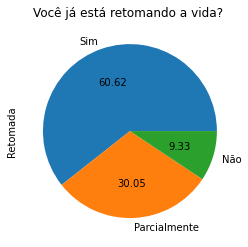

In [17]:
divisao_retorno = dados.Retomada.value_counts()
divisao_retorno.plot(kind='pie', title='Você já está retomando a vida? ', autopct="%.2f")
plt.show()

## Retomar ajuda a ficar longe dos eletrônicos?

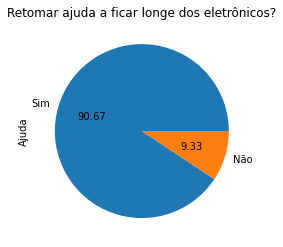

In [18]:
divisao_ajuda = dados.Ajuda.value_counts()
divisao_ajuda.plot(kind='pie', title='Retomar ajuda a ficar longe dos eletrônicos?', autopct="%.2f")
plt.show()

## Número de horas na frente do computador em diferentes profissões

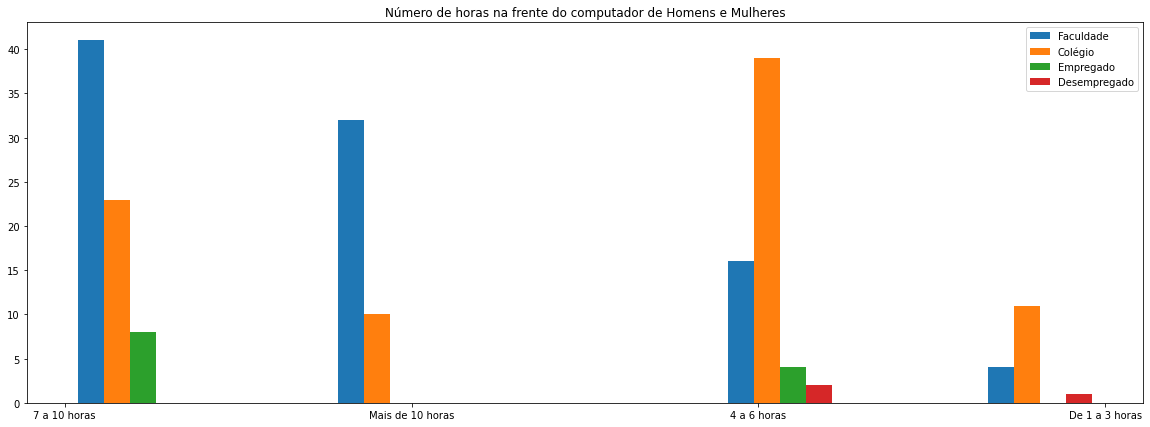

In [19]:
plt.figure(figsize=(20,7))
bins = 8
plt.hist([uni['Horas'][::-1], col['Horas'][::-1], emp['Horas'][::-1], des['Horas'][::-1]], bins, label=['Faculdade', 'Colégio', 'Empregado', 'Desempregado'])
plt.legend(loc='upper right')
plt.title("Número de horas na frente do computador de Homens e Mulheres")
plt.show()

## Número de horas na frente do computador em diferentes sexos

In [20]:
homem = dados.loc[dados.Gênero=="Masculino"]
mulher = dados.loc[dados.Gênero=="Feminino"]

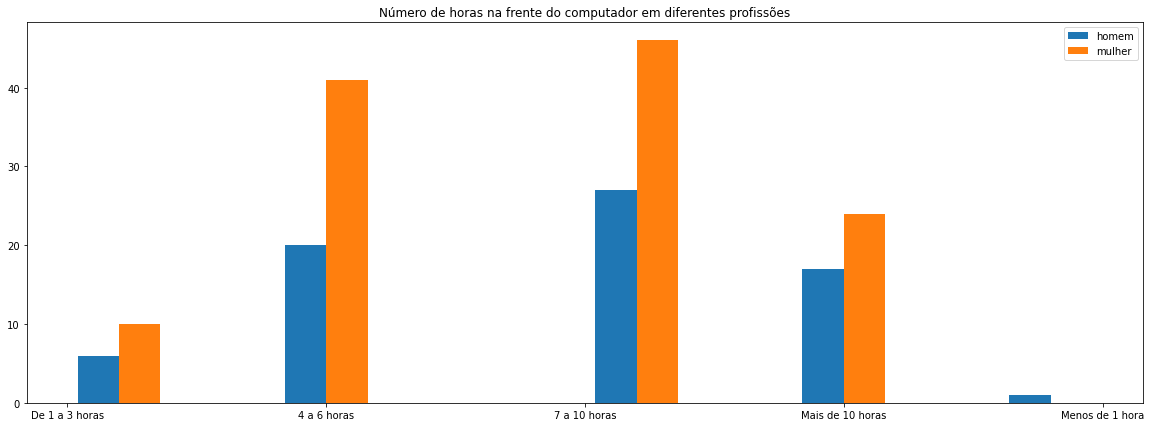

In [21]:
plt.figure(figsize=(20,7))
bins = 8
plt.hist([homem['Horas'][::-1], mulher['Horas'][::-1]], label=["homem","mulher"])
plt.legend(loc='upper right')
plt.title("Número de horas na frente do computador em diferentes profissões")
plt.show()

Distribuição de horas por idade

In [22]:
Jovem = dados.loc[dados.Idade<18] 
Adulto = dados.loc[dados.Idade>18]

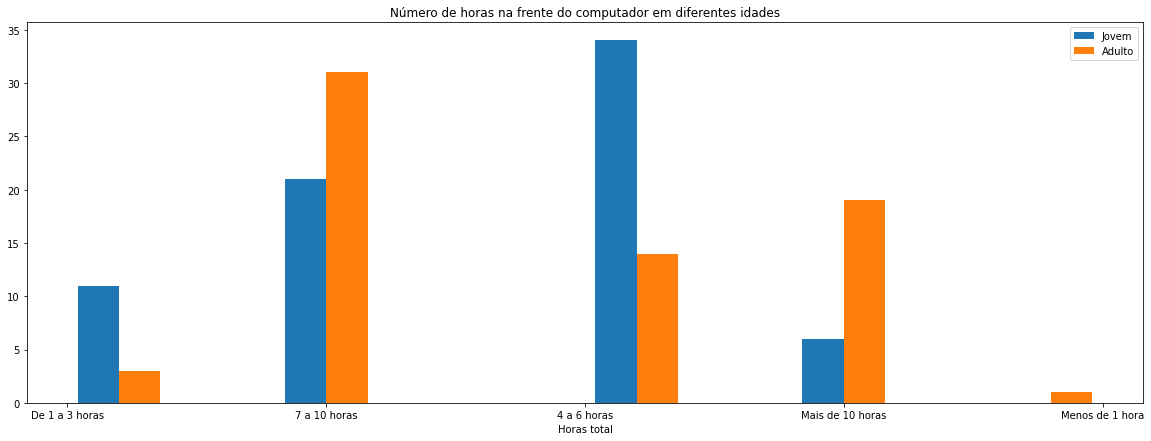

In [23]:
plt.figure(figsize=(20,7))
bins = 8
plt.hist([Jovem['Horas'][::-1], Adulto['Horas'][::-1]], label=["Jovem","Adulto"])
plt.legend(loc='upper right')
plt.xlabel("Horas total")
plt.title("Número de horas na frente do computador em diferentes idades")
plt.show()

Aumento por idade

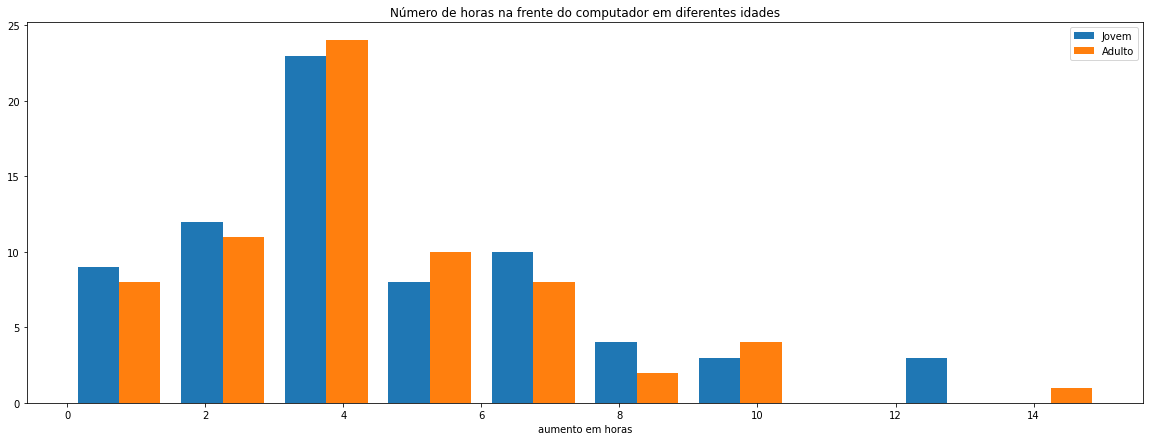

In [24]:
plt.figure(figsize=(20,7))
plt.hist([Jovem['Aumento'], Adulto['Aumento']], label=["Jovem","Adulto"])
plt.legend(loc='upper right')
plt.xlabel("aumento em horas")
plt.title("Número de horas na frente do computador em diferentes idades")
plt.show()

Aumento por profissão

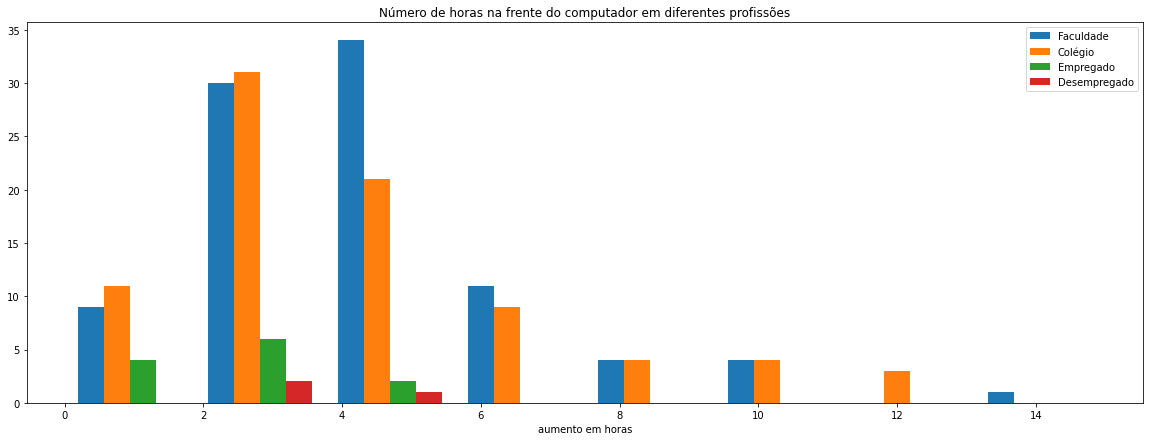

In [25]:
plt.figure(figsize=(20,7))
plt.hist([uni['Aumento'], col['Aumento'], emp['Aumento'], des['Aumento']], bins, label=['Faculdade', 'Colégio', 'Empregado', 'Desempregado'])
plt.legend(loc='upper right')
plt.xlabel("aumento em horas")
plt.title("Número de horas na frente do computador em diferentes profissões")
plt.show()

Modelos de Predição

Regressão linear

Gráfico Masculino

In [26]:
xm = homem['Idade']
ym = homem['Aumento']

Xm_dados = sm.add_constant(xm)

In [27]:
model = sm.OLS(ym.astype(float), Xm_dados.astype(float))    

results = model.fit()   

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Aumento   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.4219
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.518
Time:                        19:14:31   Log-Likelihood:                -169.44
No. Observations:                  71   AIC:                             342.9
Df Residuals:                      69   BIC:                             347.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3674      0.905      4.827      0.000       2.562       6.172
Idade         -0.0279      0.043     -0.650      0.518      -0.114       0.058
==============================================================================
Omnibus:                       16.041   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.136
Skew:                           1.038   Prob(JB):                     6.99e-05
Kurtosis:                       4.469   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gráfico feminino

In [28]:
xf = mulher['Idade']
yf = mulher['Aumento']

Xf_dados = sm.add_constant(xf)

In [29]:
model1 = sm.OLS(yf.astype(float), Xf_dados.astype(float))    

results1 = model1.fit()   

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Aumento   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.719
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0562
Time:                        19:14:31   Log-Likelihood:                -287.67
No. Observations:                 121   AIC:                             579.3
Df Residuals:                     119   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2699      0.609      8.655      0.000       4.064       6.476
Idade         -0.0549      0.028     -1.928      0.056      -0.111       0.001
==============================================================================
Omnibus:                       33.009   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.190
Skew:                           1.252   Prob(JB):                     1.04e-12
Kurtosis:                       5.162   Cond. No.                         54.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
bf0 = results1.params['const']
bf1 = results1.params['Idade'] 

print(f"Estimativa do coeficente linear {bf0}")
print(f"Estimativa do coeficiente angular {bf1}")

Estimativa do coeficente linear 5.269891172210813
Estimativa do coeficiente angular -0.054920904513454646


In [31]:
results1.predict

xf_vec = np.linspace(xf.min(), xf.max(), 500)
yf_vec = bf0 + bf1*xf_vec

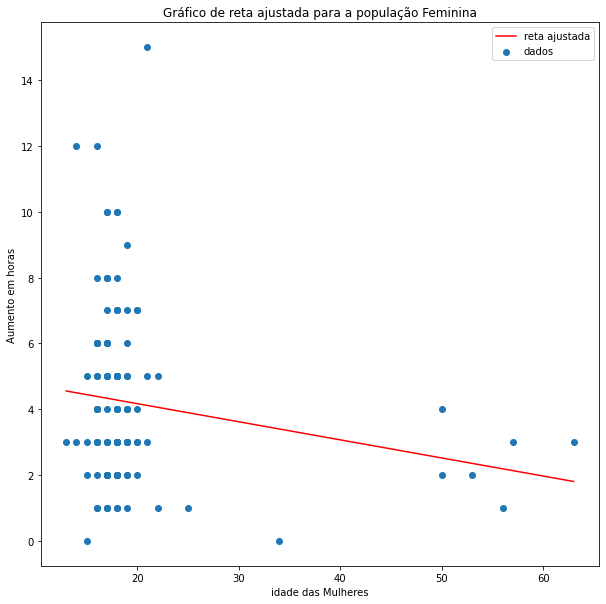

In [32]:
plt.figure(figsize=(10,10))
plt.plot(xf_vec,yf_vec,'r')
plt.scatter(xf, yf);
plt.title('Gráfico de reta ajustada para a população Feminina')
plt.xlabel("idade das Mulheres")
plt.ylabel("Aumento em horas")
plt.legend(('reta ajustada','dados'))
plt.show()

Gráfico Adulto

In [33]:
xa = Adulto['Idade']
ya = Adulto['Aumento']

Xa_dados = sm.add_constant(xa)

In [34]:
modela = sm.OLS(ya, Xa_dados)    

resultsa = modela.fit()   

resultsa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Aumento   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.560
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0364
Time:                        19:14:32   Log-Likelihood:                -161.66
No. Observations:                  68   AIC:                             327.3
Df Residuals:                      66   BIC:                             331.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5128      0.734      7.510      0.000       4.047       6.978
Idade         -0.0573      0.027     -2.135      0.036      -0.111      -0.004
==============================================================================
Omnibus:                       24.931   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.329
Skew:                           1.312   Prob(JB):                     3.90e-10
Kurtosis:                       5.900   Cond. No.                         62.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
ba0 = resultsa.params['const']
ba1 = resultsa.params['Idade'] 

print(f"Estimativa do coeficente linear {ba0}")
print(f"Estimativa do coeficiente angular {ba1}")

Estimativa do coeficente linear 5.512767889575008
Estimativa do coeficiente angular -0.05733745005448604


In [36]:
resultsa.predict

xa_vec = np.linspace(xa.min(), xa.max(), 500)
ya_vec = ba0 + ba1*xa_vec

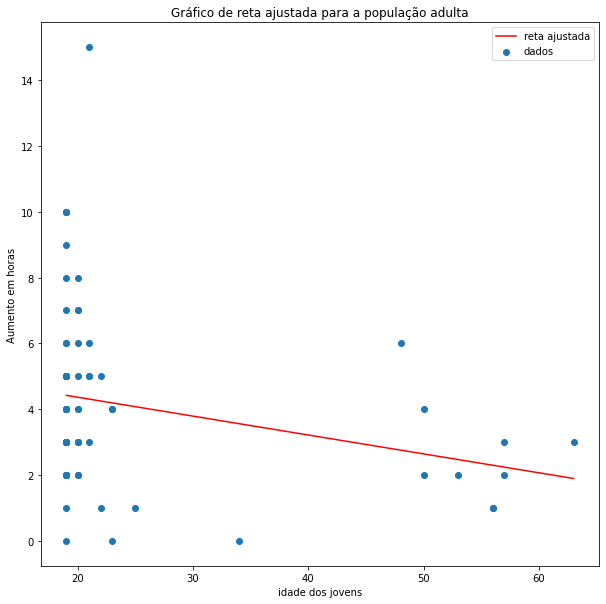

In [37]:
plt.figure(figsize=(10,10))
plt.plot(xa_vec,ya_vec,'r')
plt.scatter(xa, ya);
plt.title('Gráfico de reta ajustada para a população adulta')
plt.xlabel("idade dos jovens")
plt.ylabel("Aumento em horas")
plt.legend(('reta ajustada','dados'))
plt.show()

## Modelo de regressão linear múltipla

In [1]:
dados['Gênero_index'] = dados.Gênero.map( {'Feminino':0,'Masculino':1,'Outro':1})
dados['Estado_index'] = dados.Estado.map({'Solteiro':0,'Casado':1,'Outro':1})
dados['Emprego_index'] = dados.Emprego.map({'Estudante universitário':0,'Empregador':1,'Empregado':2,'Desempregado':3,'Estudante de colegial':4})
dados['Horas_index']=dados.Horas.map({'Menos de 1 hora':0,'De 1 a 3 horas':1,'4 a 6 horas':2,'7 a 10 horas':3,'Mais de 10 horas':4})
dados['Vontade_index'] = dados.Vontade.map({'Sim':0,'Não':1})
dados['Pandemia_index'] = dados.Pandemia.map({'Sim, aumentei o numero de horas':0,'Sim, diminui o número de horas':1,'Não':2})
dados['Ajuda_index'] = dados.Ajuda.map({'Sim':0,'Não':1})
dados.dropna()
dados

NameError: name 'dados' is not defined

In [ ]:
y = dados['Aumento']
x = dados[['Idade','Gênero_index','Estado_index','Emprego_index','Horas_index','Pandemia_index','Ajuda_index']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
model = sm.OLS(y_train, x_train)    

results = model.fit()   

results.summary()  

In [ ]:
bi = results.params[0]
bg = results.params[1]
be = results.params[2] 
bem = results.params[3] 
bh = results.params[4] 
bp = results.params[5] 
ba = results.params[6]

In [ ]:
modelo = LinearRegression()
modelo.fit(x_train,y_train)

In [ ]:
coeff_parameter = pd.DataFrame(modelo.coef_,x.columns,columns=['Coefficient'])
coeff_parameter

In [ ]:
predictions = modelo.predict(x_test)